## Predictive Model
This notebook contains the predictive model ran on the dataset. First, we use a bag of words model for our variables to get a count of each word in the lyrics. Then those numbers are ran through a neural network to get a multilabel output that tries to predict the artist.

### Project submission group 6
- Group member 1
    - Name: Michael Visco
    - Email: mjv64@drexel.edu
- Group member 2
    - Name: Abhishek Shetty
    - Email: aas373@drexel.edu
- Group member 3
    - Name: Siddharth Dudugu
    - Email: sd3627@drexel.edu
- Group member 4
    - Name: Harsh Ramesh
    - Email: hr439@drexel.edu

### Additional submission comments
- Tutoring support received: NA
- Other (other): NA

`This is the first step, here we have imported the dataset and have dislayed a sample fo the dataset`

In [37]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

df = pandas.read_csv("data/Songs.csv")
df.head()

,Artist,Title,Lyrics
0,Taylor Swift,cardigan,"Vintage tee, brand new phone\nHigh heels on co..."
1,Taylor Swift,exile,"I can see you standing, honey\nWith his arms a..."
2,Taylor Swift,Lover,We could leave the Christmas lights up 'til Ja...
3,Taylor Swift,the 1,"I'm doing good, I'm on some new shit\nBeen say..."
4,Taylor Swift,Look What You Made Me Do,I don't like your little games\nDon't like you...


`We have displayed the name of the columns from the dataset`

In [38]:
for row in df:
    print(row)

Artist
Title
Lyrics


`In this setp we have tokenized the one single lyrics and have inspected any abnormalities during the tokenization, to rectify it in further process.` 

In [39]:
import spacy
nlp = spacy.load("en_core_web_sm")
lyrics = df["Lyrics"]
sample_list = []
song_lyrics = []
index = 0
#print(lyrics)
for index,lyric in enumerate(lyrics):
    #print(lyric)
    
    sample = lyric.split("\n")
    sample_list.append(sample)
    index += 1
    #print(index)
    
    
#print(sample_list[0])
new_list = []

for item in sample_list[0]:
    sample = item.split(" ")
    new_list.append(sample)
#print(new_list)

for lists in new_list:
    song_lyrics.append(lists)
#print(song_lyrics)
merged_list = [item for sublist in song_lyrics for item in sublist]
print(merged_list)


['Vintage', 'tee,', 'brand', 'new', 'phone', 'High', 'heels', 'on', 'cobblestones', 'When', 'you', 'are', 'young,', 'they', 'assume', 'you', 'know\u2005nothing', 'Sequin\u2005smile,', 'black', 'lipstick', 'Sensual\u2005politics', 'When', 'you', 'are', 'young,', 'they', 'assume\u2005you', 'know', 'nothing', '', 'But', 'I', 'knew', 'you', "Dancin'", 'in', 'your', "Levi's", 'Drunk', 'under', 'a', 'streetlight,', 'I', 'I', 'knew', 'you', 'Hand', 'under', 'my', 'sweatshirt', 'Baby,', 'kiss', 'it', 'better,', 'I', '', 'And', 'when', 'I', 'felt', 'like', 'I', 'was', 'an', 'old', 'cardigan', 'Under', "someone's", 'bed', 'You', 'put', 'me', 'on', 'and', 'said', 'I', 'was', 'your', 'favorite', '', 'A', 'friend', 'to', 'all', 'is', 'a', 'friend', 'to', 'none', 'Chase', 'two', 'girls,', 'lose', 'the', 'one', 'When', 'you', 'are', 'young,', 'they', 'assume', 'you', 'know', 'nothing', 'But', 'I', 'knew', 'you', 'Playing', 'hide-and-seek', 'and', 'Giving', 'me', 'your', 'weekends,', 'I', 'I', 'knew',

`In this step we have tokenized the lyrics and removed unwanted inclusions in the tokenization step, we have then insterted this new tokenized entry into a column called tokenized lyrics`

In [40]:
df['Tokenized_lyrics'] = df['Lyrics'].replace('/n', ' ', regex=True).apply(lambda x: ' '.join(x.split()))

# Print the updated DataFrame
print(df.head())


         Artist                     Title  \
0  Taylor Swift                  cardigan   
1  Taylor Swift                     exile   
2  Taylor Swift                     Lover   
3  Taylor Swift                     the 1   
4  Taylor Swift  Look What You Made Me Do   

                                              Lyrics  \
0  Vintage tee, brand new phone\nHigh heels on co...   
1  I can see you standing, honey\nWith his arms a...   
2  We could leave the Christmas lights up 'til Ja...   
3  I'm doing good, I'm on some new shit\nBeen say...   
4  I don't like your little games\nDon't like you...   

                                    Tokenized_lyrics  
0  Vintage tee, brand new phone High heels on cob...  
1  I can see you standing, honey With his arms ar...  
2  We could leave the Christmas lights up 'til Ja...  
3  I'm doing good, I'm on some new shit Been sayi...  
4  I don't like your little games Don't like your...  


`In this tep the team has created three new columns namely for Lyrics length, standardized lyrics length and average lyrics length respectively. In this step we have added the lyrics length of each of the songs, standardized the lyrics length and finally calculated the average lyrics length for an artist considering all his/her songs in the datset. `

In [41]:
drop_words = ['a', 'I', 'an', 'the', 'and', 'on']
df['Tokenized_lyrics'] = df['Lyrics'].replace('/n', ' ', regex=True).apply(lambda x: ' '.join([word for word in x.split() if word not in drop_words]))

# Print the updated DataFrame
#print(df.head())

# Count the number of words in each row of Tokenized_lyrics
df['lyrics_length'] = df['Tokenized_lyrics'].apply(lambda x: len(x.split()))

df['standardized_length'] = round((df['lyrics_length'] - np.mean(df['lyrics_length'])) / np.std(df['lyrics_length']), 2)

# Compute average lyrics length for each artist
avg_lyrics_length = df.groupby('Artist')['lyrics_length'].mean()

# Add average lyrics length to a new column in the DataFrame
df['average_lyrics_length'] = df['Artist'].map(avg_lyrics_length)

print(df.head())

         Artist                     Title  \
0  Taylor Swift                  cardigan   
1  Taylor Swift                     exile   
2  Taylor Swift                     Lover   
3  Taylor Swift                     the 1   
4  Taylor Swift  Look What You Made Me Do   

                                              Lyrics  \
0  Vintage tee, brand new phone\nHigh heels on co...   
1  I can see you standing, honey\nWith his arms a...   
2  We could leave the Christmas lights up 'til Ja...   
3  I'm doing good, I'm on some new shit\nBeen say...   
4  I don't like your little games\nDon't like you...   

                                    Tokenized_lyrics  lyrics_length  \
0  Vintage tee, brand new phone High heels cobble...            281   
1  can see you standing, honey With his arms arou...            416   
2  We could leave Christmas lights up 'til Januar...            233   
3  I'm doing good, I'm some new shit Been saying ...            277   
4  don't like your little games Don't

`Here we have displayed the top 10 artists with highest average lyrics length and the bottom 10 artists as well. ` 

In [42]:
avg_lyrics_length = df.groupby('Artist')['lyrics_length'].mean()

# Print the top 10 and lowest 10 artists by average lyrics length
print('Top 10 artists by average lyrics length:')
print(avg_lyrics_length.sort_values(ascending=False).head(10))
print('/nLowest 10 artists by average lyrics length:')
print(avg_lyrics_length.sort_values().head(10))

Top 10 artists by average lyrics length:
Artist
Bob Dylan             404.850000
Ed Sheeran            358.000000
​twenty one pilots    354.866667
Taylor Swift          347.080000
Lana Del Rey          330.233333
George Michael        302.466667
Billy Joel            262.100000
Bruce Springsteen     260.600000
Leonard Cohen         260.560000
Queen                 246.366667
Name: lyrics_length, dtype: float64
/nLowest 10 artists by average lyrics length:
Artist
Nat King Cole     127.766667
Eric Clapton      142.480000
Frank Sinatra     158.966667
Ray LaMontagne    185.066667
The Beatles       195.171429
Billie Eilish     204.440000
John Denver       209.800000
Bryan Adams       216.833333
David Bowie       230.880000
Vance Joy         239.333333
Name: lyrics_length, dtype: float64


`This is a plot of the average lyrics length ofr artists`

<Figure size 1800x1800 with 0 Axes>

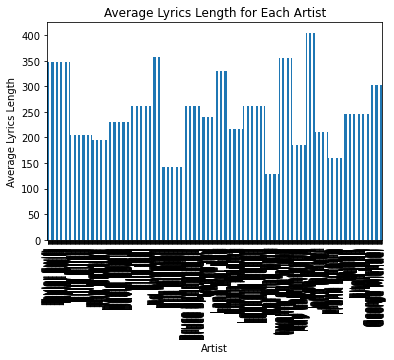

In [43]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a bar chart of average lyrics length for each artist
plt.figure(figsize=(25, 25))
df.plot(kind='bar', x='Artist', y='average_lyrics_length', legend=None)
plt.xlabel('Artist')
plt.ylabel('Average Lyrics Length')
plt.title('Average Lyrics Length for Each Artist')
plt.show()

### Part 2





In below step we used the nltk library WordNetLemmatizer to Lemmatize the tokenized words. The lyrics first have been tokenised and then lemmatised. Also, we used the required nltk extensions such as wordnet,averaged perceptron tagger for the Lemmatizing the lyrics and doing Parts of Speech Tagging. We removed all the english stopwords and punctuations as well. 

In [44]:
import nltk
from nltk.stem import WordNetLemmatizer 
import string
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet') 
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('stopwords')
import string
lemmatizer = WordNetLemmatizer()
from nltk import pos_tag
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words("english")
stopwords.extend(string.punctuation)



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91902\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91902\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91902\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91902\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91902\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning.
This function returns the tokenised lyrics in a list that is stored in a column called Tokenised_words. 

In [45]:
#Tokenization
def get_word_tokens(sentence):
    tokenized_sentence = nltk.word_tokenize(sentence)
    words = [token for token in tokenized_sentence if token.isalpha() and token not in stopwords]
    return words

df['Tokenised_words'] = df['Tokenized_lyrics'].apply(get_word_tokens)
print(df['Tokenised_words'])

0      [Vintage, tee, brand, new, phone, High, heels,...
1      [see, standing, honey, With, arms, around, bod...
2      [We, could, leave, Christmas, lights, January,...
3      [I, good, I, new, shit, Been, saying, yes, ins...
4      [like, little, games, Do, like, tilted, stage,...
                             ...                        
740    [The, first, time, ever, saw, face, thought, s...
741    [Now, every, day, see, face, They, crack, smil...
742    [GTI, Hot, Shot, He, parks, piss, Bullyboy, go...
743    [Maybe, mama, gave, boy, Maybe, daddy, love, e...
744    [Tonight, Do, fight, Tonight, want, go, sleep,...
Name: Tokenised_words, Length: 745, dtype: object


Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down to its root meaning to identify similarities.It switches any kind of a word to its base root mode.

In [46]:
# Lemmatization
df['Lemmatized_lyrics'] = df['Tokenized_lyrics'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for i in x.split() for word in i.split(' ') if word not in stopwords]))
print(df['Lemmatized_lyrics'])

0      Vintage tee, brand new phone High heel cobbles...
1      see standing, honey With arm around body Laugh...
2      We could leave Christmas light 'til January An...
3      I'm good, I'm new shit Been saying "yes" inste...
4      like little game Don't like tilted stage The r...
                             ...                        
740    The first time ever saw face thought sun rose ...
741    Now every day see face They crack smile, talk ...
742    GTI, Hot Shot He park there, piss Bullyboy, go...
743    Maybe mama gave up, boy Maybe daddy love enoug...
744    Tonight Do fight Tonight? want go sleep Turn l...
Name: Lemmatized_lyrics, Length: 745, dtype: object


Part-of-speech (POS) tagging, also called grammatical tagging, is the automatic assignment of part-of-speech tags to words in a sentence.POS is a grammatical classification that commonly includes verbs, adjectives, adverbs, nouns, etc.

In [47]:
#POS Tagging

def get_pos_tags(sentence):
    tokenized_words = get_word_tokens(sentence)
    pos_tags = nltk.pos_tag(tokenized_words)
    return pos_tags

df['tagged'] = df['Tokenized_lyrics'].apply(get_pos_tags)

In [48]:
df.head()
#df.shape

,Artist,Title,Lyrics,Tokenized_lyrics,lyrics_length,standardized_length,average_lyrics_length,Tokenised_words,Lemmatized_lyrics,tagged
0,Taylor Swift,cardigan,"Vintage tee, brand new phone\nHigh heels on co...","Vintage tee, brand new phone High heels cobble...",281,0.30,347.08,"[Vintage, tee, brand, new, phone, High, heels,...","Vintage tee, brand new phone High heel cobbles...","[(Vintage, NNP), (tee, NN), (brand, NN), (new,..."
1,Taylor Swift,exile,"I can see you standing, honey\nWith his arms a...","can see you standing, honey With his arms arou...",416,1.48,347.08,"[see, standing, honey, With, arms, around, bod...","see standing, honey With arm around body Laugh...","[(see, VB), (standing, VBG), (honey, NN), (Wit..."
2,Taylor Swift,Lover,We could leave the Christmas lights up 'til Ja...,We could leave Christmas lights up 'til Januar...,233,-0.11,347.08,"[We, could, leave, Christmas, lights, January,...",We could leave Christmas light 'til January An...,"[(We, PRP), (could, MD), (leave, VB), (Christm..."
3,Taylor Swift,the 1,"I'm doing good, I'm on some new shit\nBeen say...","I'm doing good, I'm some new shit Been saying ...",277,0.27,347.08,"[I, good, I, new, shit, Been, saying, yes, ins...","I'm good, I'm new shit Been saying ""yes"" inste...","[(I, PRP), (good, VBP), (I, PRP), (new, JJ), (..."
4,Taylor Swift,Look What You Made Me Do,I don't like your little games\nDon't like you...,don't like your little games Don't like your t...,509,2.29,347.08,"[like, little, games, Do, like, tilted, stage,...",like little game Don't like tilted stage The r...,"[(like, IN), (little, JJ), (games, NNS), (Do, ..."


Word Frquency: It is the ability to count the frequency of the terms used in a text document or table. In our case we have counted the frequency of the words using Counter and tokenised words of the lyrics on the basis of the song of each artist.

In [49]:
#Get frequency of words as dictionary
from collections import Counter
def word_frequency(text):
  tokens = nltk.word_tokenize(text.lower())
  stopwords = nltk.corpus.stopwords.words('english')
  stopwords.extend(string.punctuation)
  words = [token for token in tokens if token.isalpha() and token not in stopwords]
  if words:
    word_counts = Counter(words)
    return dict(word_counts)
  else:
    return {}

df['word_frequency'] = df['Tokenized_lyrics'].apply(word_frequency)

from collections import defaultdict

merged_dict = defaultdict(int)
for d in df['word_frequency']:
    for k, v in d.items():
        merged_dict[k] += v

word_frequency_df = pd.DataFrame.from_dict(merged_dict, orient='index', columns=['Frequency'])
word_frequency_df.index.name = 'Word'
word_frequency_df.sort_values(by='Frequency', ascending=False, inplace=True)


In [50]:
df.head()

,Artist,Title,Lyrics,Tokenized_lyrics,lyrics_length,standardized_length,average_lyrics_length,Tokenised_words,Lemmatized_lyrics,tagged,word_frequency
0,Taylor Swift,cardigan,"Vintage tee, brand new phone\nHigh heels on co...","Vintage tee, brand new phone High heels cobble...",281,0.30,347.08,"[Vintage, tee, brand, new, phone, High, heels,...","Vintage tee, brand new phone High heel cobbles...","[(Vintage, NNP), (tee, NN), (brand, NN), (new,...","{'vintage': 1, 'tee': 1, 'brand': 1, 'new': 1,..."
1,Taylor Swift,exile,"I can see you standing, honey\nWith his arms a...","can see you standing, honey With his arms arou...",416,1.48,347.08,"[see, standing, honey, With, arms, around, bod...","see standing, honey With arm around body Laugh...","[(see, VB), (standing, VBG), (honey, NN), (Wit...","{'see': 3, 'standing': 1, 'honey': 2, 'arms': ..."
2,Taylor Swift,Lover,We could leave the Christmas lights up 'til Ja...,We could leave Christmas lights up 'til Januar...,233,-0.11,347.08,"[We, could, leave, Christmas, lights, January,...",We could leave Christmas light 'til January An...,"[(We, PRP), (could, MD), (leave, VB), (Christm...","{'could': 2, 'leave': 1, 'christmas': 1, 'ligh..."
3,Taylor Swift,the 1,"I'm doing good, I'm on some new shit\nBeen say...","I'm doing good, I'm some new shit Been saying ...",277,0.27,347.08,"[I, good, I, new, shit, Been, saying, yes, ins...","I'm good, I'm new shit Been saying ""yes"" inste...","[(I, PRP), (good, VBP), (I, PRP), (new, JJ), (...","{'good': 1, 'new': 1, 'shit': 2, 'saying': 1, ..."
4,Taylor Swift,Look What You Made Me Do,I don't like your little games\nDon't like you...,don't like your little games Don't like your t...,509,2.29,347.08,"[like, little, games, Do, like, tilted, stage,...",like little game Don't like tilted stage The r...,"[(like, IN), (little, JJ), (games, NNS), (Do, ...","{'like': 6, 'little': 1, 'games': 1, 'tilted':..."


We used the word frquency to find the most common words used in the song by eah artist 

In [51]:
#Get most common word

def most_common_word(text):
    tokens = nltk.word_tokenize(text.lower())
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(string.punctuation)
    words = [token for token in tokens if token.isalpha() and token not in stopwords]
    word_counts = Counter(words)
    if word_counts:
        return [word for word, count in word_counts.most_common(3)]
    else:
        return []

df['most_common_word'] = df['Tokenized_lyrics'].apply(most_common_word)

most_common_words_by_artist = df.groupby('Artist')['most_common_word'].apply(lambda x: [word for words in x for word in words]).apply(Counter).apply(lambda x: [word for word, count in x.most_common(3)])



In [52]:
df.head()

,Artist,Title,Lyrics,Tokenized_lyrics,lyrics_length,standardized_length,average_lyrics_length,Tokenised_words,Lemmatized_lyrics,tagged,word_frequency,most_common_word
0,Taylor Swift,cardigan,"Vintage tee, brand new phone\nHigh heels on co...","Vintage tee, brand new phone High heels cobble...",281,0.30,347.08,"[Vintage, tee, brand, new, phone, High, heels,...","Vintage tee, brand new phone High heel cobbles...","[(Vintage, NNP), (tee, NN), (brand, NN), (new,...","{'vintage': 1, 'tee': 1, 'brand': 1, 'new': 1,...","[knew, like, young]"
1,Taylor Swift,exile,"I can see you standing, honey\nWith his arms a...","can see you standing, honey With his arms arou...",416,1.48,347.08,"[see, standing, honey, With, arms, around, bod...","see standing, honey With arm around body Laugh...","[(see, VB), (standing, VBG), (honey, NN), (Wit...","{'see': 3, 'standing': 1, 'honey': 2, 'arms': ...","[never, gave, warning]"
2,Taylor Swift,Lover,We could leave the Christmas lights up 'til Ja...,We could leave Christmas lights up 'til Januar...,233,-0.11,347.08,"[We, could, leave, Christmas, lights, January,...",We could leave Christmas light 'til January An...,"[(We, PRP), (could, MD), (leave, VB), (Christm...","{'could': 2, 'leave': 1, 'christmas': 1, 'ligh...","[take, go, forever]"
3,Taylor Swift,the 1,"I'm doing good, I'm on some new shit\nBeen say...","I'm doing good, I'm some new shit Been saying ...",277,0.27,347.08,"[I, good, I, new, shit, Been, saying, yes, ins...","I'm good, I'm new shit Been saying ""yes"" inste...","[(I, PRP), (good, VBP), (I, PRP), (new, JJ), (...","{'good': 1, 'new': 1, 'shit': 2, 'saying': 1, ...","[never, would, know]"
4,Taylor Swift,Look What You Made Me Do,I don't like your little games\nDon't like you...,don't like your little games Don't like your t...,509,2.29,347.08,"[like, little, games, Do, like, tilted, stage,...",like little game Don't like tilted stage The r...,"[(like, IN), (little, JJ), (games, NNS), (Do, ...","{'like': 6, 'little': 1, 'games': 1, 'tilted':...","[made, look, ooh]"


###Sentiment Analysis

Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral. We have used nltk library SentimentIntensityAnalyser to find the sentiment of each song.

We have also calculated the Polarity scores/Sentiment scores for each song which ranges from -1 to 1.

Polarity refers to the overall sentiment conveyed by a particular text, phrase or word. This polarity can be expressed as a numerical rating known as a “sentiment score”. 

In [53]:
#Sentiment Analysis 

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Add a new column to the DataFrame to store the sentiment scores
df['sentiment'] = df['Tokenized_lyrics'].apply(lambda x: sia.polarity_scores(x))

# Extract the compound sentiment score from the sentiment dictionary
df['compound_sentiment'] = df['sentiment'].apply(lambda x: x['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91902\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


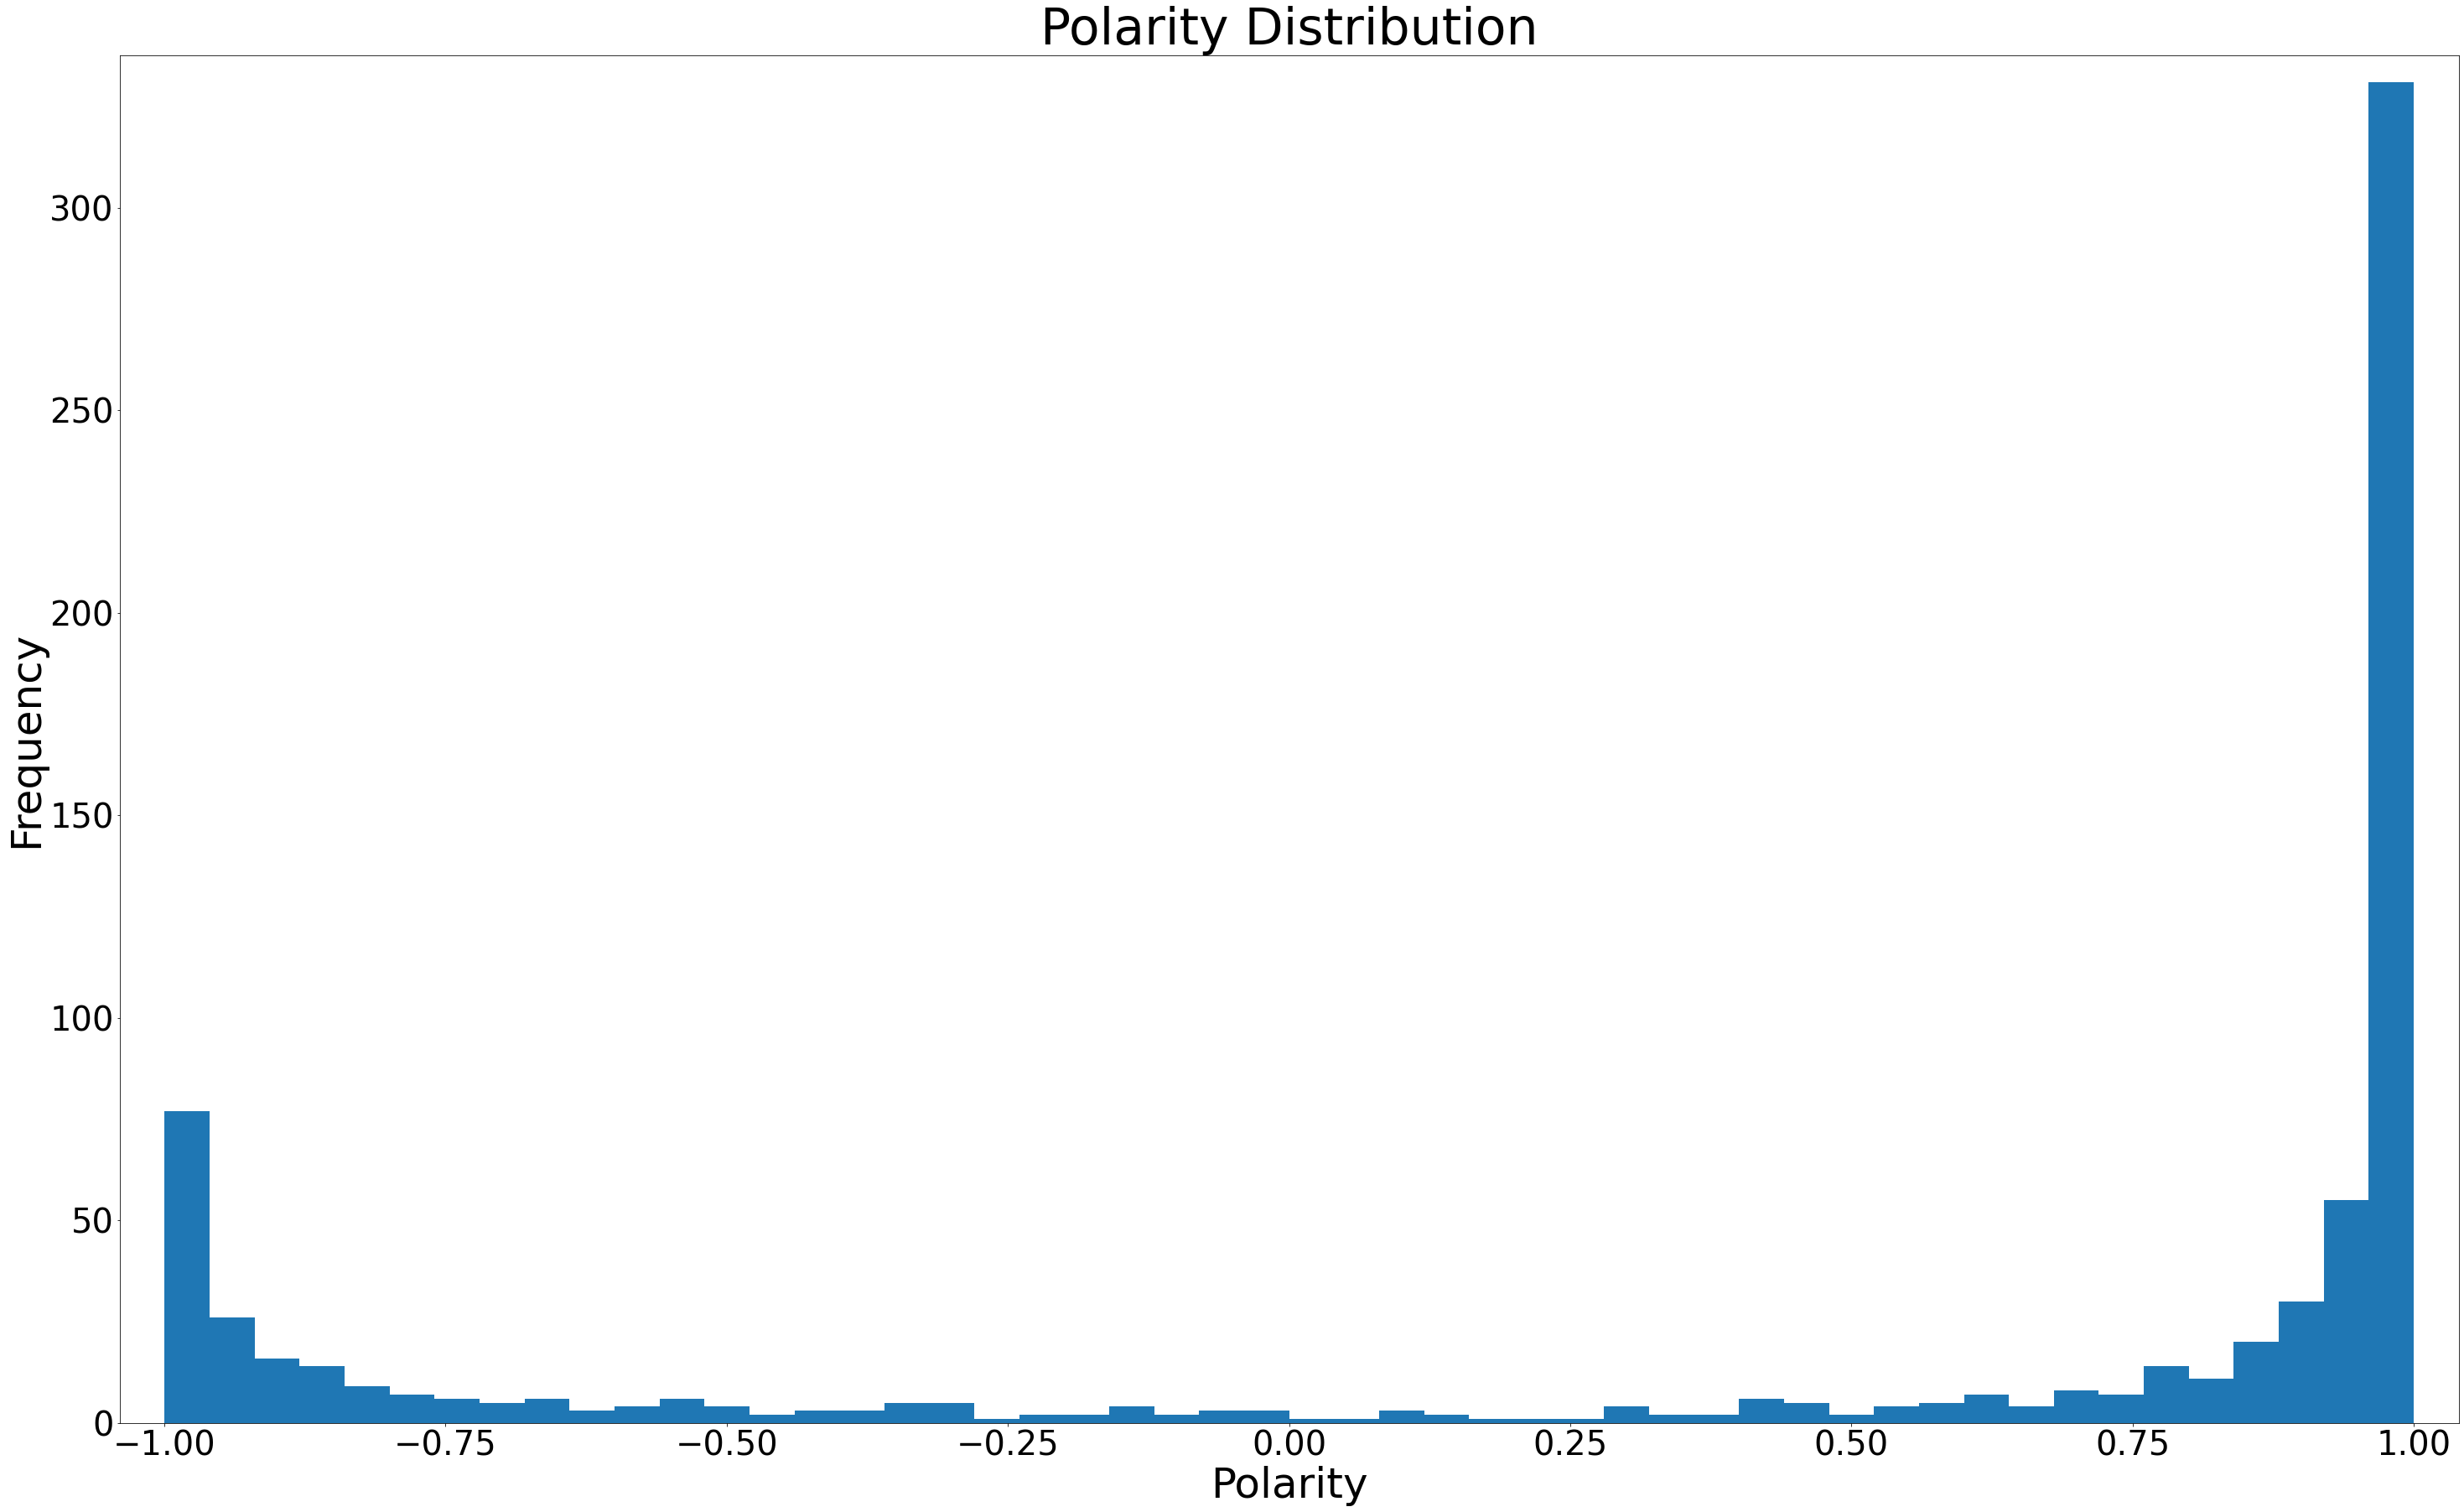

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Polarity', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['compound_sentiment'] ,bins=50)
plt.title('Polarity Distribution', fontsize=60)
plt.show()

In [55]:
#As the polarity Distribution shows most of the songs are positive and very few are negative songs. 


In [56]:
#Encode polarity into "Positive","Negative","Neutral" based on the score

df["polarity_encoded"]=['Positive' if x>0 else 'Negative' if x<0 else 'Neutral' for x in df['compound_sentiment'] ]

In [57]:
#Print the number of songs of each category of Polarity
df["polarity_encoded"].value_counts()

Positive    527
Negative    215
Neutral       3
Name: polarity_encoded, dtype: int64